# Proyecto HOUSE PRICE TEHRAN

En este proyecto vamos a realizar un EDA y un algoritmo de Machine Learning, que me permitan predicir el valor de las casas en Tehran(Iran), que fueronextraidos del siguiente DataSet ecnontrado en Kaggle https://www.kaggle.com/datasets/mokar2001/house-price-tehran-iran.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #para hacer graficas
import seaborn as sns #hacer graficas
import numpy as np #metodo numericos
from scipy.stats import norm #Este es el que se utiliza para poder ver metodos estadisticos
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
%matplotlib inline

# Step 1 



1.   Leemos mi archivo CSV.
2.   verificamos cuales son las columnas de mis dataset.
3.   observamos si hay valores nulos dentro de mi dataset y los tipos de valores que tenemos dentro de este.



In [2]:
df=pd.read_csv('precio casas.csv',sep=';')

In [3]:
df.head()

Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0    63     1     True       True      True         Shahran  1.850000e+09   
1    60     1     True       True      True         Shahran  1.850000e+09   
2    79     2     True       True      True          Pardis  5.500000e+08   
3    95     2     True       True      True   Shahrake Qods  9.025000e+08   
4   123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33

In [4]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [5]:
df.shape

(3479, 8)

# Step 2

1. Decidimos obversar cuales son los valores que estan nulos. 
2. Nos enfretamos a nuestra primera decisión ¿ Que hago con los valores nulos, los promedio, los elimino o elimino la columna?


In [6]:
df[pd.isnull(df["Address"])==True].head(3)

Area  Room  Parking  Warehouse  Elevator Address         Price  \
43     60     2     True       True      True     NaN  2.650000e+09   
662    85     2     True       True      True     NaN  1.955000e+09   
706   117     2     True       True      True     NaN  6.500000e+09   

     Price(USD)  
43     88333.33  
662    65166.67  
706   216666.67

Vemos que son valores de dirección que de cierta forma nos pueden aportar valor a nuestro EDA. Por lo cual observaremos la dirección de los precios de las casas. sin embargo, para objeto de nuestro EDA vamos a elminar estos datos para ver la distribución por Addrees.

In [7]:
idx=df[pd.isnull(df["Address"])==True].index.tolist()

In [8]:
df1=df.drop(index=idx)

In [9]:
df1.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

En este apartado vamos agregar columnas que nos permitan tener una mejor lectura de la variables booleanas

In [10]:
df1["Park"]=df1["Parking"].map({True:"YES",False:"NO"})
df1["Ware"]=df1["Warehouse"].map({True:"YES",False:"NO"})
df1["Ele"]=df1["Elevator"].map({True:"YES",False:"NO"})

# Step 3



1.   Vamos a ver los tipos de distribución, presentes en nuestro datos numericos
2.   Vamor a ver la contabilización de nuestras variables Categoricas
3.   vamos a ver las correlaciones presentes en mis datos.



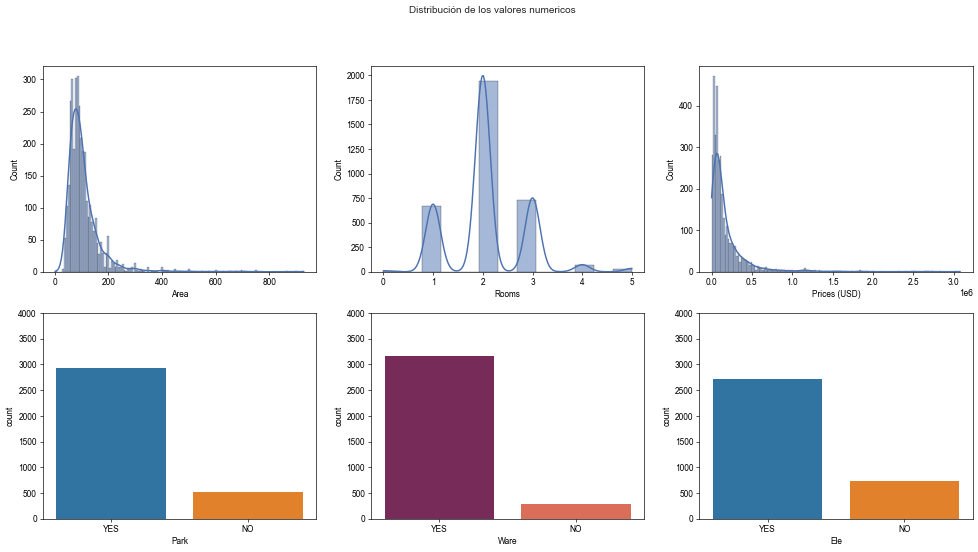

In [11]:
figure ,ax = plt.subplots(2,3,figsize=(20,10)
plt.style.use("seaborn")
figure.suptitle("Distribución de los valores numericos")
ax[0,0]=sns.histplot(x=df1["Area"],kde=True,ax=ax[0,0])
ax[0,1]=sns.histplot(x=df1["Room"],kde=True,ax=ax[0,1])
ax[0,2]=sns.histplot(x=df1["Price(USD)"],kde=True,ax=ax[0,2])
ax[1,0]=sns.countplot(data=df1,x=df1["Park"],ax=ax[1,0],palette="tab10")
ax[1,1]=sns.countplot(data=df1,x=df1["Ware"],ax=ax[1,1],palette="rocket")
ax[1,2]=sns.countplot(data=df1,x=df1["Ele"],ax=ax[1,2],palette="tab10")
ax[1,0].set_ylim(0,4000)
ax[1,1].set_ylim(0,4000)
ax[1,2].set_ylim(0,4000)
ax[0,0].set_xlabel("Area")
ax[0,1].set_xlabel("Rooms")
ax[0,2].set_xlabel("Prices (USD)");


In [12]:
df1.describe().round(0)


Area    Room         Price  Price(USD)
count  3456.0  3456.0  3.456000e+03      3456.0
mean    107.0     2.0  5.379957e+09    179332.0
std      70.0     1.0  8.121729e+09    270724.0
min       1.0     0.0  3.600000e+06       120.0
25%      69.0     2.0  1.420000e+09     47333.0
50%      90.0     2.0  2.900000e+09     96667.0
75%     120.0     2.0  6.000000e+09    200000.0
max     929.0     5.0  9.240000e+10   3080000.0

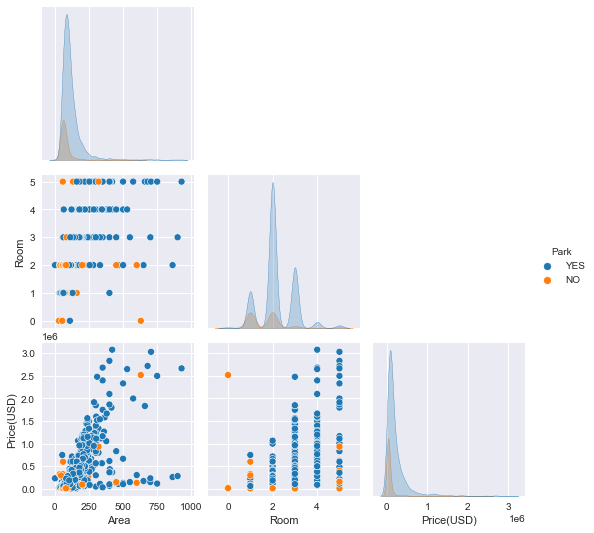

In [13]:
sns.pairplot(df1,x_vars=["Area","Room","Price(USD)"],y_vars=["Area","Room","Price(USD)"],palette="tab10",hue="Park",corner=True)

In [14]:
df_corr=df1.corr()

<AxesSubplot:>

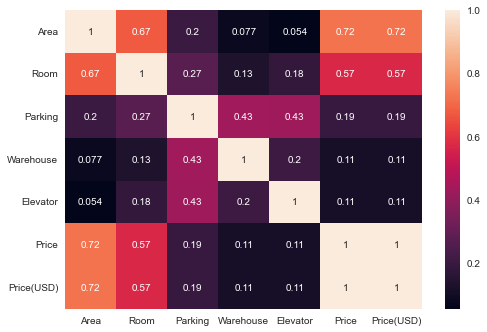

In [15]:
sns.heatmap(df_corr,annot=True)

Observando las medidas de tendencia estandar, que hemos graficado anteriormente, observamos una correlación positiva entre el Area, room y Price(USD).

<AxesSubplot:xlabel='Price(USD)', ylabel='Area'>

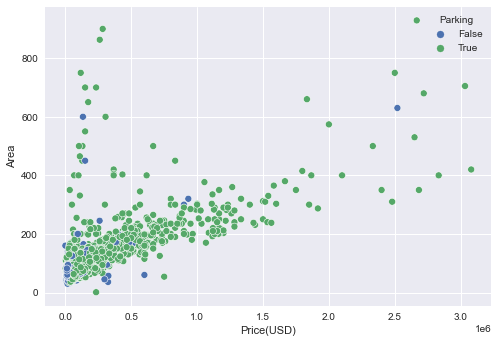

In [16]:
sns.scatterplot(data=df1,x="Price(USD)",y="Area",hue="Parking")

Observamos que el parqueadero es un componente importante, ya que la mayoría de las viviendas cuentan con este servicio. El cual seguiremos tomando como objeto de estudio. A continuación, ahondaremos en las direcciones para identificar donde se encuentran las más apetecidas y las de mayor oferta. 

# Step 4

1. ubicaremos las direcciones mas apetecidas y las que mas volumen de oferta tienen para concluir nuestro EDA y darle paso a nustro Algoritmo de Machine Learning

In [17]:
df1["Address"].nunique() # tenemos 192 direcciones unicas donde se concentran nuestros datos.

192

In [18]:
df["Address"].value_counts().head(10)

Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
Saadat Abad               129
Parand                    127
Shahr-e-Ziba              109
Southern Janatabad         93
Central Janatabad          91
Name: Address, dtype: int64

In [19]:
df1.shape[0]

3456

In [20]:
li=[x for x in range(0,150)]
por=[]
for i in range(0,150):
    por.append((df1["Address"].value_counts().head(i).sum())/df1.shape[0])

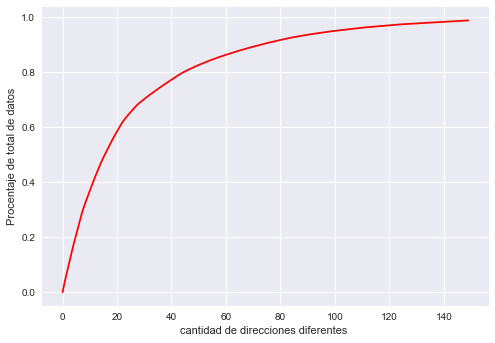

In [21]:
plt.plot(li,por,"r")
plt.xlabel("cantidad de direcciones diferentes ")
plt.ylabel("Procentaje de total de datos");

In [22]:
suma=(df1["Address"].value_counts().head(20).sum())/df1.shape[0]
print(f'El porcentaje que representan las 20 direcciones que mas se venden casas en teheran es de {suma:.2%}')

El porcentaje que representan las 50 direcciones que mas se venden casas en teheran es de 58.39%


Estos datos que acabamos de averiguar me hacen preguntar ¿Por qué las primeras 20 direcciones representan el 58.4% de mis datos? ¿Qué características especiales tienen estos barrios en cuestión de Área y price(USD)? 

In [23]:
dir=df1["Address"].value_counts().head(20).index

In [24]:
df2=df1[df1["Address"].isin(dir)]

In [25]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df2,y=df2.Address,x=df2["Area"])
plt.xticks(rotation=90);


In [26]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df2,y=df2.Address,x=df2["Price(USD)"])
plt.xticks(rotation=90);

Al observar las distribuciones, nos damos cuenta de algunas relaciones que pueden exitir entre el area y precio de ciertas casas, por esta razon vamos ahondar un poco mas y graficar un sactter plot por barrio de estas dos variables.

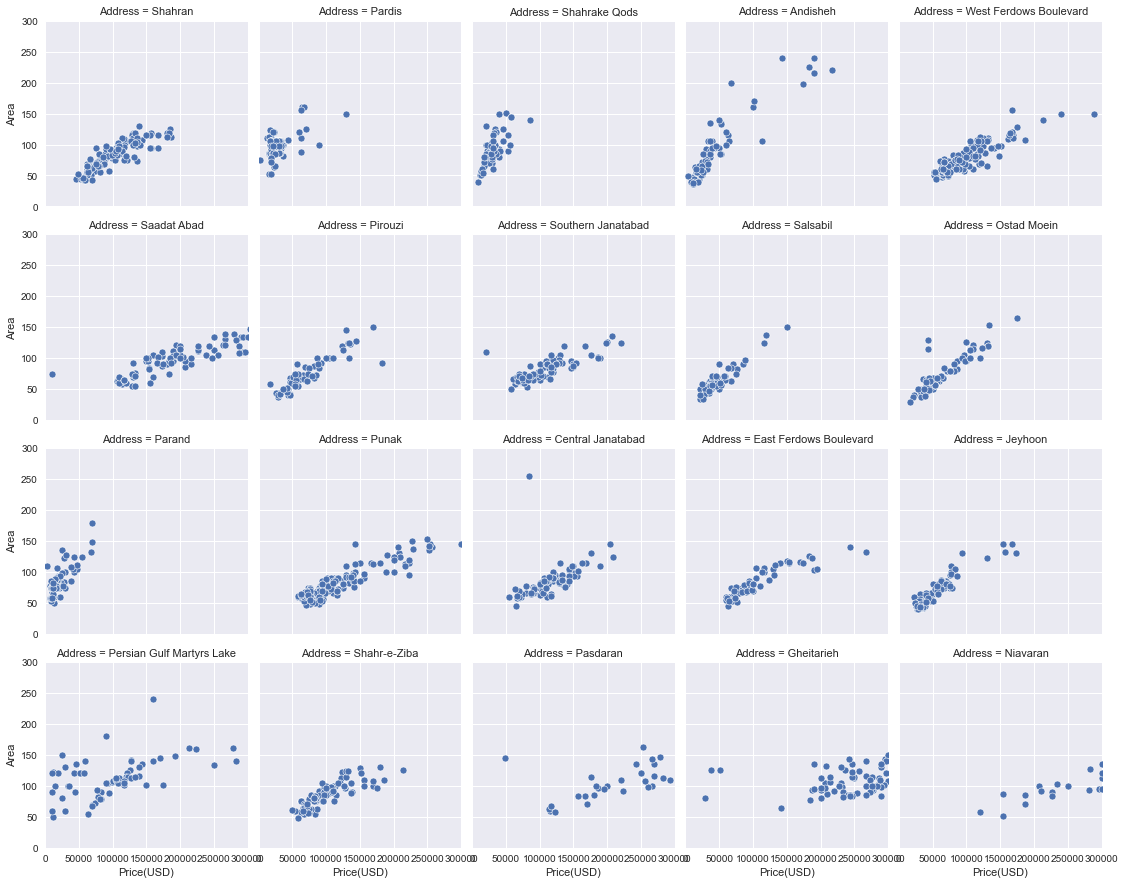

In [27]:
sns.relplot(data=df2,x="Price(USD)",col=df2["Address"],y="Area",col_wrap=5,height=3.1)
plt.xlim(0,300000);
plt.ylim(0,300);

# Conclusión del EDA

Como conclusión y dándonos cuenta a partir de las últimas gráficas, podemos inferir que un barrio como Niavaran en Teherán; Tiene un costo de vida alto. Ya que, presenta un alto costo por los metros cuadrados construidos, cosa contraria de Pardis. A razón de que este barrio presenta altos metros cuadrados de vivienda a un costo muy bajo. Dando fuerza a la hipótesis, de que Pardis es un barrio marginal donde impera la inestabilidad social y Niavaran puede representar una mayor calidad de vida. 

Siendo así, vamos a responder las preguntas formuladas en la mitad de este EDA:
* ¿Por qué las primeras 20 direcciones representan el 58.4% de mis datos?
Esto ocurre porque hay varias tendencias marcadas en mis resultados:
1) Se debe que la gente de zonas marginales como Pardis o Shahrake desean salir de estos suburbios y migrar barrios mejores
2) Barrios de clase media como Punak o Pirouzi son muy apetecidos por los ciudadanos de Teherán
3) Los barrios más pudientes de este país como Niavaran representan el poder y el status en Teherán, razón suficiente para algunos ciudadanos para vivir ahí a pesar de los altos costos
* ¿Qué características especiales tienen estos barrios en cuestión de Área y price(USD)?

Las características especiales de estos barrios son su cantidad de variables como las mencionadas anteriormente y que estos barrios son los que tiene una historia y futuro en Teherán.

# Vamos a entrar al modelo de Machine Learning para este DataSet

Como vamos a entrar a realizar nuestro modelo de Machine Learning con la regresión lineal, vamos nuevamente a utilizar nuestro DF ya limpio y con la conversión de nuestras variables categóricas en variables numéricas. 

In [28]:
dfm=df2.copy()

In [29]:
dfm.head(3)

Area  Room  Parking  Warehouse  Elevator  Address         Price  \
0    63     1     True       True      True  Shahran  1.850000e+09   
1    60     1     True       True      True  Shahran  1.850000e+09   
2    79     2     True       True      True   Pardis  5.500000e+08   

   Price(USD) Park Ware  Ele  
0    61666.67  YES  YES  YES  
1    61666.67  YES  YES  YES  
2    18333.33  YES  YES  YES

In [30]:
col=["Parking","Warehouse","Elevator"]

In [31]:
dfm[col]=dfm[col].astype(int)

In [32]:
col1=["Price","Park","Ware","Ele","Address"]

In [33]:
dfm=dfm.drop(columns=col1)

In [34]:
dfm.head(3)

Area  Room  Parking  Warehouse  Elevator  Price(USD)
0    63     1        1          1         1    61666.67
1    60     1        1          1         1    61666.67
2    79     2        1          1         1    18333.33

In [35]:
dfm.describe().round(0)

Area    Room  Parking  Warehouse  Elevator  Price(USD)
count  2018.0  2018.0   2018.0     2018.0    2018.0      2018.0
mean     97.0     2.0      1.0        1.0       1.0    142074.0
std      49.0     1.0      0.0        0.0       0.0    189889.0
min      30.0     0.0      0.0        0.0       0.0      2000.0
25%      68.0     2.0      1.0        1.0       1.0     43333.0
50%      86.0     2.0      1.0        1.0       1.0     85833.0
75%     110.0     2.0      1.0        1.0       1.0    153333.0
max     863.0     5.0      1.0        1.0       1.0   2683333.0

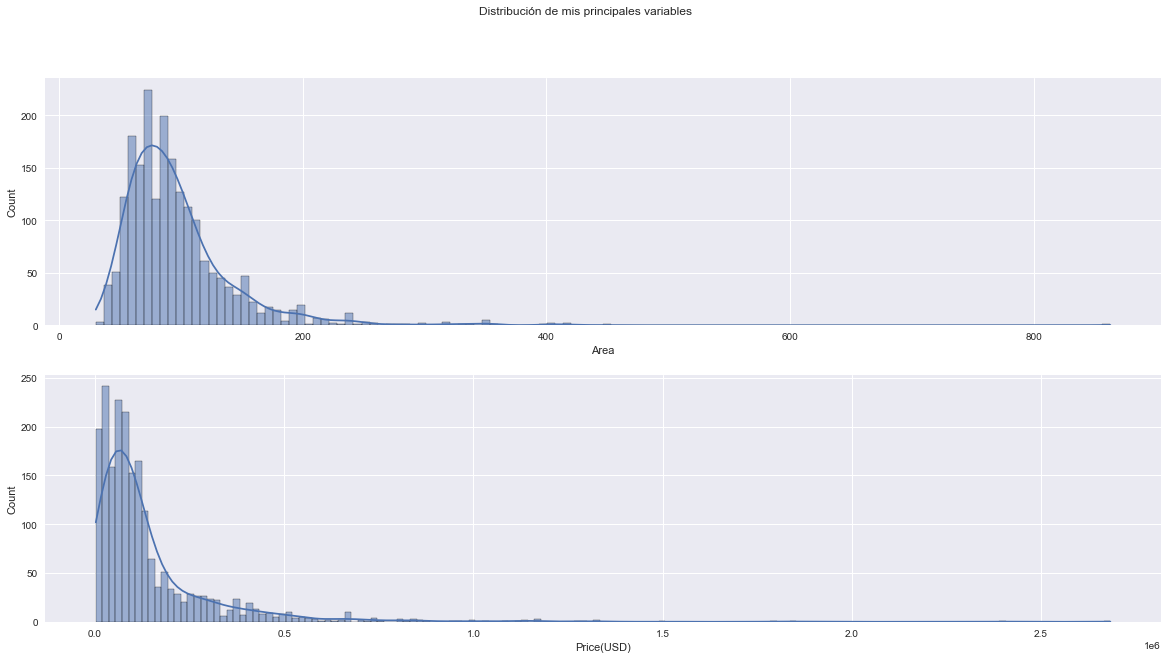

In [36]:
figure ,ax = plt.subplots(2,figsize=(20,10))
plt.style.use("seaborn")
figure.suptitle("Distribución de mis principales variables")
ax[0]=sns.histplot(x=dfm["Area"],kde=True,ax=ax[0])
ax[1]=sns.histplot(x=dfm["Price(USD)"],kde=True,ax=ax[1])

<AxesSubplot:>

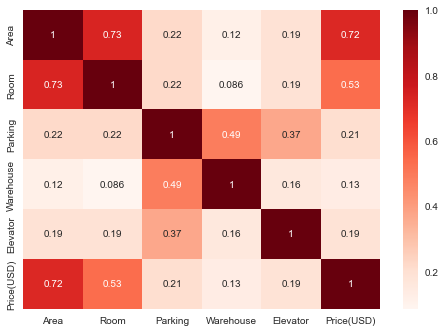

In [37]:

sns.heatmap(dfm.corr(),annot=True,cmap="Reds")

Para efectos prácticos de este Machine Learning, vamos a descartar los datos de área que son mayores a 200 metros cuadrados y 500000 USD dólares. Ya que superan, indudablemente, el promedio de esta zona del mundo. Cabe aclarar, que esta decisión es arbitraria y debe preguntarse aun experto si estas medidas son buenas o malas.

In [38]:
dfm=dfm[(dfm["Area"]<400) & (dfm["Price(USD)"]<500000)]

In [39]:
dfm.describe().round(0)

Area    Room  Parking  Warehouse  Elevator  Price(USD)
count  1928.0  1928.0   1928.0     1928.0    1928.0      1928.0
mean     91.0     2.0      1.0        1.0       1.0    112036.0
std      34.0     1.0      0.0        0.0       0.0    100495.0
min      30.0     0.0      0.0        0.0       0.0      2000.0
25%      67.0     2.0      1.0        1.0       1.0     40000.0
50%      85.0     2.0      1.0        1.0       1.0     80000.0
75%     105.0     2.0      1.0        1.0       1.0    136000.0
max     350.0     5.0      1.0        1.0       1.0    495000.0

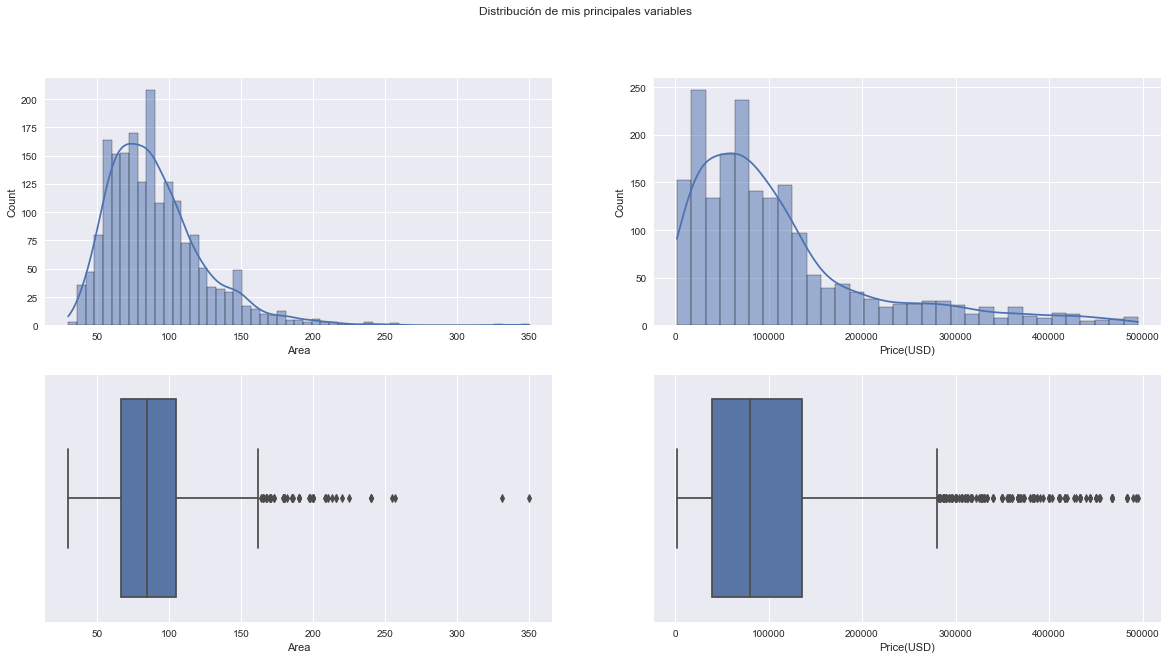

In [40]:
figure ,ax = plt.subplots(2,2,figsize=(20,10))
plt.style.use("seaborn")
figure.suptitle("Distribución de mis principales variables")
ax[0,0]=sns.histplot(x=dfm["Area"],kde=True,ax=ax[0,0])
ax[0,1]=sns.histplot(x=dfm["Price(USD)"],kde=True,ax=ax[0,1])
ax[1,0]=sns.boxplot(x=dfm["Area"],ax=ax[1,0])
ax[1,1]=sns.boxplot(x=dfm["Price(USD)"],ax=ax[1,1])

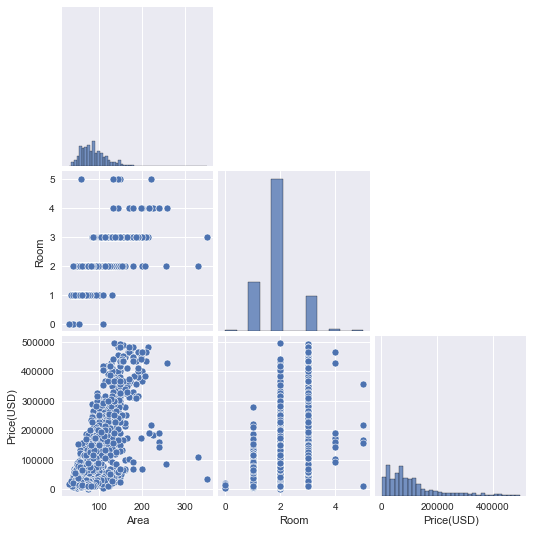

In [41]:
sns.pairplot(dfm,x_vars=["Area","Room","Price(USD)"],y_vars=["Area","Room","Price(USD)"],palette="tab10",corner=True)

En la primer parte de este pequeño analisis, logramos observar coomo exite una relevancia considerable entre el precio y las otras variables presentes en mi data. En los siguientes pasos, vamos a estandarizar mis datos para obtener mejor resultados de mi modelo

In [42]:
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [43]:
scaler=StandardScaler()

In [44]:
x_cols=list(set(dfm.columns)-set(["Price(USD)"]))

In [45]:
x_cols

['Area', 'Parking', 'Room', 'Elevator', 'Warehouse']

In [46]:
df_cols=dfm[x_cols]

In [47]:
df_cols.head(3)

Area  Parking  Room  Elevator  Warehouse
0    63        1     1         1          1
1    60        1     1         1          1
2    79        1     2         1          1

In [48]:
df_cols.describe().round(0)

Area  Parking    Room  Elevator  Warehouse
count  1928.0   1928.0  1928.0    1928.0     1928.0
mean     91.0      1.0     2.0       1.0        1.0
std      34.0      0.0     1.0       0.0        0.0
min      30.0      0.0     0.0       0.0        0.0
25%      67.0      1.0     2.0       1.0        1.0
50%      85.0      1.0     2.0       1.0        1.0
75%     105.0      1.0     2.0       1.0        1.0
max     350.0      1.0     5.0       1.0        1.0

como vemos de nuestros datos de entrenamiento, vamos a relizar una normalización de nuestros datos de area. Ya que,  asi como observamos en los capitulos anteriores nos dimos cuenta que estos datos no tiene una distrubicción gausseana

In [49]:
df_cols.shape


(1928, 5)

In [50]:
X_std=scaler.fit_transform(df_cols)
price_std=scaler.fit_transform(dfm["Price(USD)"].values.reshape(-1,1))


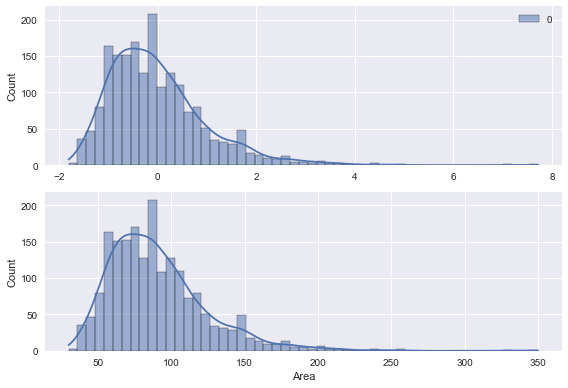

In [51]:
fig , ax = plt.subplots(2)
ax[0]=sns.histplot(scaler.fit_transform(df_cols["Area"].values.reshape(-1,1)),kde=True,ax=ax[0])
ax[1]=sns.histplot(dfm["Area"],kde=True,ax=ax[1])
plt.tight_layout()

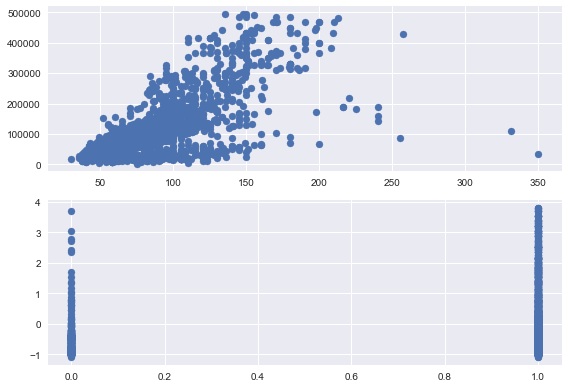

In [52]:
fig ,ax=plt.subplots(2)
ax[0].scatter(y=dfm["Price(USD)"],x=dfm["Area"])
ax[1].scatter(y=price_std,x=df_cols["Elevator"])
fig.tight_layout()

Ahora procedemos a entrenar nuestro modelo de regressión llineal

In [53]:
(X_train,X_test,y_train,y_test)=train_test_split(X_std,price_std,train_size=0.75,random_state=44)

In [54]:
reg = linear_model.Ridge(fit_intercept=False)

In [55]:
reg.fit(X_train,y_train)

Ridge(fit_intercept=False)

In [56]:
print(f'El valor de mi regressión lineal es {reg.score(X_train,y_train):.2%}')

El valor de mi regressión lineal es 46.51%


In [57]:
y_pred=reg.predict(X_test)

In [58]:
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
print(f'EL valor del R2 es de: {r2:.3} y el valor de cuadrados minimo es: {mse:.3f}')

EL valor del R2 es de: 0.434 y el valor de cuadrados minimo es: 0.588


In [59]:
X2=sm.add_constant(df_cols)
_1=sm.OLS(price_std,X2).fit()
print(_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     324.1
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          4.44e-252
Time:                        12:04:54   Log-Likelihood:                -2146.3
No. Observations:                1928   AIC:                             4305.
Df Residuals:                    1922   BIC:                             4338.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1561      0.077    -27.832      0.0

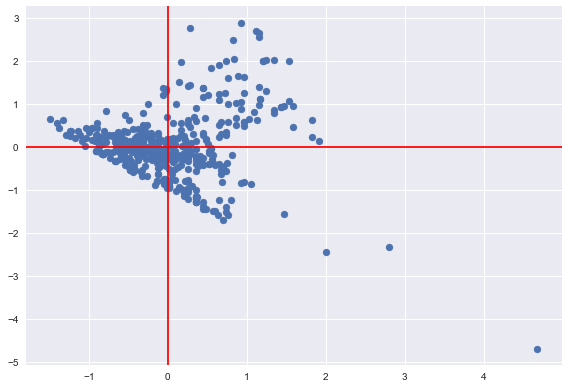

In [60]:
residuales=np.subtract(y_test,y_pred)
plt.scatter(y_pred,residuales)
plt.axhline(0,color="red")
plt.axvline(0,color="red")
plt.tight_layout()

Vemos con esta última gráfica como mis datos se alejan de esa idealidad razonable, distanciándose del origen de mis coordenadas, esto ocurre por la gran variación de mis datos, ya que tenemos casas en el sector más exclusivo de Teherán y las zonas más marginas, esto se puede atribuir a una desigualdad social muy grande presente en Irán. Sin embargo, se buscó minimizar esta variación de datos, con la estandarización, pero no se logró.

# Conclusión

Al Observar los resultados, podemos observar que acertado puede estar mi modelo. Sin embargo, denotamos que la regresión lineal utilizada no se ajusta a mis muestras para poder dar una buena predicción de los precios de estas casas. Cabe recalcar, que podemos atribuir este comportamiento a la falta de Features que me permitan ahondar más y seccionar más mis datos para mejorar la calidad del modelo. Del mismo modo, cabe mencionar que se realizaron varias pruebas de entranamietno sobre este modelo y este fue el resultados mas consistente que se obtuvo al considerar todas las variables.

De manera personal y con criterio propio, puedo atribuir este bajo score conseguido de mi modelo lineal, a la falta de features que me permitan hacer una mejor predicción, sin embargo, esta no es una excusa, sino una sugerencia de como se podría mejorar el modelo. Además, Estos datos tiene mucha variación, la cual es una gran castigadora de mi modelo, cuestión que se buscó minimizar al momento de estandarizar los datos sin un resultado significante. Como sugerencia par mejorar el modelo, se pueden observar en una manipulación de los precios al realizar una categorización para que un algoritmo más potente de ML que permita encontrar patrones dentro de mis datos. Por ejemplo, asignar A un rango de 1000 - 10000 USD y así sucesivamente para mejorar la calidad del ML. 

# Spin OFF 

Vamos a relizar el modelo de entrenamiento con los datos obtenido en el EDA final.

In [83]:
x_cols2=x_cols+["Address"]
dfso=df2[x_cols2]

In [87]:
dfso[col]=dfso[col].astype(int)
dfso=pd.get_dummies(dfso,columns=["Address"],drop_first=True)

C:\Users\piere\AppData\Local\Temp\ipykernel_13408\3893111360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfso[col]=dfso[col].astype(int)


In [88]:
dfso.head(3)

Area  Parking  Room  Elevator  Warehouse  Address_Central Janatabad  \
0    63        1     1         1          1                          0   
1    60        1     1         1          1                          0   
2    79        1     2         1          1                          0   

   Address_East Ferdows Boulevard  Address_Gheitarieh  Address_Jeyhoon  \
0                               0                   0                0   
1                               0                   0                0   
2                               0                   0                0   

   Address_Niavaran  ...  Address_Persian Gulf Martyrs Lake  Address_Pirouzi  \
0                 0  ...                                  0                0   
1                 0  ...                                  0                0   
2                 0  ...                                  0                0   

   Address_Punak  Address_Saadat Abad  Address_Salsabil  Address_Shahr-e-Ziba  \
0              0                    0                 0                     0   
1              0                    0                 0                     0   
2              0                    0                 0                     0   

   Address_Shahrake Qods  Address_Shahran  Address_Southern Janatabad  \
0                      0                1                           0   
1                      0                1                           0   
2                      0                0                           0   

   Address_West Ferdows Boulevard  
0                               0  
1                               0  
2                               0  

[3 rows x 24 columns]

In [89]:
x_std=scaler.fit_transform(dfso)
y_std=scaler.fit_transform(df2["Price(USD)"].values.reshape(-1,1))

In [100]:
(X_train,X_test,y_train,y_test)=train_test_split(x_std,y_std,train_size=0.75,random_state=44)

In [101]:
reg.fit(X_train,y_train)

Ridge(fit_intercept=False)

In [102]:
print(f'El valor de mi regressión lineal es {reg.score(X_train,y_train):.2%}')

El valor de mi regressión lineal es 71.63%


In [103]:
y_pred=reg.predict(X_test)

In [104]:
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
print(f'EL valor del R2 es de: {r2:.3} y el valor de cuadrados minimo es: {mse:.3f}')

EL valor del R2 es de: 0.789 y el valor de cuadrados minimo es: 0.155


In [105]:
X2=sm.add_constant(x_std)
_1=sm.OLS(y_std,X2).fit()
print(_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     226.1
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:40:08   Log-Likelihood:                -1537.0
No. Observations:                2018   AIC:                             3124.
Df Residuals:                    1993   BIC:                             3264.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.952e-17      0.012  -1.68e-15      1.0

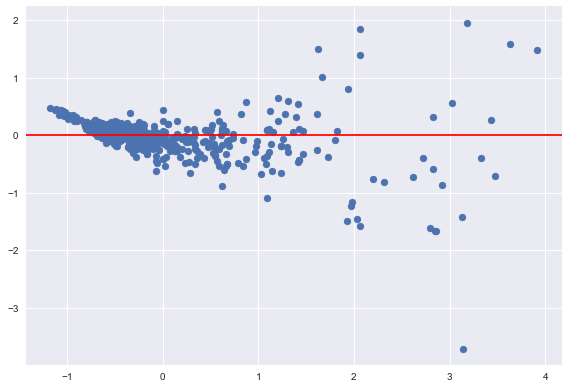

In [107]:
residuales=np.subtract(y_test,y_pred)
plt.scatter(y_pred,residuales)
plt.axhline(0,color="red")

plt.tight_layout()